# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# if you are using the workspace given by Udacity
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.13 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [5]:
# env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")
# for Udacity workspace
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [8]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


### 4. Import packages

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
from ddpg_agent import Agent
import torch
import sys

In [10]:
agent_0 = Agent(state_size, action_size, 1, 0)
agent_1 = Agent(state_size, action_size, 1, 0)

In [12]:
def maddpg(n_episodes=7500, max_t=1000, print_every=10, solved_score=0.5, moving_window_size=100):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        print_every (int)     : interval to display results
        solved_score (float)  : min avg score over consecutive episodes
        moving_window_size (int) : number of consecutive episodes used to calculate score

    """
    score_history = []  # score list
    scores_deque = deque(maxlen=moving_window_size)  # scores of the most recent episodes
    moving_averages = []  # list of moving averages

    for episode_number in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset environment
        states = np.reshape(env_info.vector_observations, (1, 48))  # get states and combine them
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)  # initialize score for each agent
        while True:
            # choose agent actions and combine them
            action_0 = agent_0.act(states, add_noise=True)
            action_1 = agent_1.act(states, add_noise=True)
            actions = np.concatenate((action_0, action_1), axis=0).flatten()
            env_info = env.step(actions)[brain_name]  # send both agents' actions together to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48))  # merge the agent next states
            rewards = env_info.rewards  # get rewards
            done = env_info.local_done  # see if episode finished
            agent_0.step(states, actions, rewards[0], next_states, done, 0)  # Agent 1 learns
            agent_1.step(states, actions, rewards[1], next_states, done, 1)  # Agent 2 learns
            scores += np.max(rewards)  # update the score for each agent
            states = next_states  # roll over states to next time step
            if np.any(done):  # exit loop if episode finished
                break
        ep_best_score = np.max(scores)
        scores_deque.append(ep_best_score)
        score_history.append(ep_best_score)
        moving_averages.append(np.mean(scores_deque))

        print("\rEpisode {}/{} | Rolling average: {:.3f}".format(episode_number, n_episodes, moving_averages[-1]), end="")
        if episode_number % print_every == 0:
            print('')
            sys.stdout.flush()
        # Determine if the environment is solved and save models
        if moving_averages[-1] >= solved_score and episode_number > moving_window_size:
            print(
                f'\nEnvironment solved in {episode_number} episodes. \tMoving Average ={moving_averages[-1]:.2f} over last {moving_window_size} episodes')
            # Save the weights
            torch.save(agent_0.actor_local.state_dict(), 'actor_0.pth')
            torch.save(agent_0.critic_local.state_dict(), 'critic_0.pth')
            torch.save(agent_1.actor_local.state_dict(), 'actor_1.pth')
            torch.save(agent_1.critic_local.state_dict(), 'critic_1.pth')
            break;

    return score_history, moving_averages

In [13]:
score_history, moving_average = maddpg()

Episode 10/7500 | Rolling average: 0.010
Episode 20/7500 | Rolling average: 0.010
Episode 30/7500 | Rolling average: 0.007
Episode 40/7500 | Rolling average: 0.010
Episode 50/7500 | Rolling average: 0.016
Episode 60/7500 | Rolling average: 0.015
Episode 70/7500 | Rolling average: 0.014
Episode 80/7500 | Rolling average: 0.020
Episode 90/7500 | Rolling average: 0.021
Episode 100/7500 | Rolling average: 0.020
Episode 110/7500 | Rolling average: 0.020
Episode 120/7500 | Rolling average: 0.024
Episode 130/7500 | Rolling average: 0.028
Episode 140/7500 | Rolling average: 0.031
Episode 150/7500 | Rolling average: 0.035
Episode 160/7500 | Rolling average: 0.037
Episode 170/7500 | Rolling average: 0.040
Episode 180/7500 | Rolling average: 0.037
Episode 190/7500 | Rolling average: 0.040
Episode 200/7500 | Rolling average: 0.042
Episode 210/7500 | Rolling average: 0.044
Episode 220/7500 | Rolling average: 0.042
Episode 230/7500 | Rolling average: 0.041
Episode 240/7500 | Rolling average: 0.041
E

KeyboardInterrupt: 

NameError: name 'score_history' is not defined

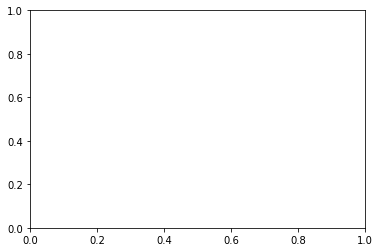

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(score_history)), score_history, label='MADDPG')
plt.plot(np.arange(len(score_history)), moving_average, c='g', label='moving average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
fig.savefig("results.pdf", bbox_inches='tight', dpi=400)
plt.show()

When finished, you can close the environment.

In [15]:
env.close()
